# Boston House Price Regression

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, 
                         columns=boston.feature_names)
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [3]:
X = boston.data
y = boston.target

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [8]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [9]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

epoch 수와 batchz_size 변경하며 test

In [10]:
history = model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test), verbose=1)

Train on 379 samples, validate on 127 samples
Epoch 1/500
379/379 [==============================] - 1s 4ms/sample - loss: 570.4531 - mae: 21.9736 - mse: 570.4531 - val_loss: 559.3247 - val_mae: 21.9390 - val_mse: 559.3247
Epoch 2/500
379/379 [==============================] - 0s 222us/sample - loss: 535.4459 - mae: 21.1164 - mse: 535.4459 - val_loss: 515.9094 - val_mae: 20.8606 - val_mse: 515.9094
Epoch 3/500
379/379 [==============================] - 0s 211us/sample - loss: 482.2080 - mae: 19.7651 - mse: 482.2080 - val_loss: 448.4505 - val_mae: 19.0628 - val_mse: 448.4505
Epoch 4/500
379/379 [==============================] - 0s 201us/sample - loss: 401.7505 - mae: 17.4815 - mse: 401.7505 - val_loss: 349.5089 - val_mae: 16.1061 - val_mse: 349.5089
Epoch 5/500
379/379 [==============================] - 0s 174us/sample - loss: 294.9810 - mae: 14.1642 - mse: 294.9811 - val_loss: 235.1508 - val_mae: 12.3548 - val_mse: 235.1508
Epoch 6/500
379/379 [==============================] - 0s 177

379/379 [==============================] - 0s 150us/sample - loss: 14.3133 - mae: 2.6050 - mse: 14.3133 - val_loss: 25.7016 - val_mae: 3.1689 - val_mse: 25.7016
Epoch 95/500
379/379 [==============================] - 0s 158us/sample - loss: 14.2835 - mae: 2.6090 - mse: 14.2835 - val_loss: 25.7952 - val_mae: 3.1821 - val_mse: 25.7952
Epoch 96/500
379/379 [==============================] - 0s 161us/sample - loss: 14.2629 - mae: 2.6144 - mse: 14.2629 - val_loss: 25.6320 - val_mae: 3.1561 - val_mse: 25.6320
Epoch 97/500
379/379 [==============================] - 0s 164us/sample - loss: 14.1863 - mae: 2.6084 - mse: 14.1863 - val_loss: 25.7725 - val_mae: 3.1860 - val_mse: 25.7725
Epoch 98/500
379/379 [==============================] - 0s 166us/sample - loss: 14.1278 - mae: 2.6056 - mse: 14.1278 - val_loss: 25.5481 - val_mae: 3.1545 - val_mse: 25.5481
Epoch 99/500
379/379 [==============================] - 0s 169us/sample - loss: 14.2724 - mae: 2.5838 - mse: 14.2724 - val_loss: 25.4550 - val_

Epoch 141/500
379/379 [==============================] - 0s 158us/sample - loss: 11.7491 - mae: 2.3555 - mse: 11.7491 - val_loss: 24.0160 - val_mae: 2.9890 - val_mse: 24.0160
Epoch 142/500
379/379 [==============================] - 0s 153us/sample - loss: 11.8491 - mae: 2.3648 - mse: 11.8491 - val_loss: 23.3633 - val_mae: 2.9392 - val_mse: 23.3633
Epoch 143/500
379/379 [==============================] - 0s 153us/sample - loss: 11.6095 - mae: 2.3394 - mse: 11.6095 - val_loss: 23.4034 - val_mae: 2.9397 - val_mse: 23.4034
Epoch 144/500
379/379 [==============================] - 0s 158us/sample - loss: 11.7819 - mae: 2.3877 - mse: 11.7819 - val_loss: 23.7241 - val_mae: 2.9849 - val_mse: 23.7241
Epoch 145/500
379/379 [==============================] - 0s 198us/sample - loss: 11.5410 - mae: 2.3221 - mse: 11.5410 - val_loss: 23.6997 - val_mae: 2.9600 - val_mse: 23.6997
Epoch 146/500
379/379 [==============================] - 0s 150us/sample - loss: 11.6990 - mae: 2.3675 - mse: 11.6990 - val_l

379/379 [==============================] - 0s 161us/sample - loss: 9.0097 - mae: 2.0492 - mse: 9.0097 - val_loss: 20.6424 - val_mae: 2.6754 - val_mse: 20.6424
Epoch 235/500
379/379 [==============================] - 0s 156us/sample - loss: 8.6588 - mae: 2.0013 - mse: 8.6588 - val_loss: 20.4515 - val_mae: 2.6794 - val_mse: 20.4515
Epoch 236/500
379/379 [==============================] - 0s 153us/sample - loss: 8.7140 - mae: 2.0154 - mse: 8.7140 - val_loss: 20.5000 - val_mae: 2.6842 - val_mse: 20.5000
Epoch 237/500
379/379 [==============================] - 0s 158us/sample - loss: 8.6241 - mae: 2.0127 - mse: 8.6241 - val_loss: 21.1129 - val_mae: 2.7299 - val_mse: 21.1129
Epoch 238/500
379/379 [==============================] - 0s 153us/sample - loss: 8.6155 - mae: 2.0380 - mse: 8.6155 - val_loss: 21.1243 - val_mae: 2.8006 - val_mse: 21.1243
Epoch 239/500
379/379 [==============================] - 0s 156us/sample - loss: 9.2832 - mae: 2.1006 - mse: 9.2832 - val_loss: 20.4759 - val_mae: 2.

379/379 [==============================] - 0s 158us/sample - loss: 7.0480 - mae: 1.8327 - mse: 7.0480 - val_loss: 18.4949 - val_mae: 2.5364 - val_mse: 18.4949
Epoch 329/500
379/379 [==============================] - 0s 153us/sample - loss: 7.0681 - mae: 1.8134 - mse: 7.0681 - val_loss: 18.1964 - val_mae: 2.5603 - val_mse: 18.1964
Epoch 330/500
379/379 [==============================] - 0s 156us/sample - loss: 6.9887 - mae: 1.8469 - mse: 6.9887 - val_loss: 18.3596 - val_mae: 2.5230 - val_mse: 18.3596
Epoch 331/500
379/379 [==============================] - 0s 156us/sample - loss: 6.8683 - mae: 1.8128 - mse: 6.8683 - val_loss: 18.3398 - val_mae: 2.5239 - val_mse: 18.3398
Epoch 332/500
379/379 [==============================] - 0s 156us/sample - loss: 6.9032 - mae: 1.8141 - mse: 6.9032 - val_loss: 17.8474 - val_mae: 2.5625 - val_mse: 17.8474
Epoch 333/500
379/379 [==============================] - 0s 161us/sample - loss: 6.9633 - mae: 1.8333 - mse: 6.9633 - val_loss: 18.1861 - val_mae: 2.

379/379 [==============================] - 0s 164us/sample - loss: 6.1168 - mae: 1.7470 - mse: 6.1168 - val_loss: 17.3184 - val_mae: 2.5800 - val_mse: 17.3184
Epoch 423/500
379/379 [==============================] - 0s 156us/sample - loss: 6.2163 - mae: 1.7778 - mse: 6.2163 - val_loss: 16.9401 - val_mae: 2.4660 - val_mse: 16.9401
Epoch 424/500
379/379 [==============================] - 0s 153us/sample - loss: 6.2456 - mae: 1.7618 - mse: 6.2456 - val_loss: 17.0375 - val_mae: 2.4688 - val_mse: 17.0375
Epoch 425/500
379/379 [==============================] - 0s 161us/sample - loss: 5.9535 - mae: 1.7227 - mse: 5.9535 - val_loss: 17.0129 - val_mae: 2.4472 - val_mse: 17.0129
Epoch 426/500
379/379 [==============================] - 0s 150us/sample - loss: 5.9229 - mae: 1.6999 - mse: 5.9229 - val_loss: 17.0222 - val_mae: 2.4239 - val_mse: 17.0222
Epoch 427/500
379/379 [==============================] - 0s 153us/sample - loss: 5.9302 - mae: 1.7005 - mse: 5.9302 - val_loss: 16.9028 - val_mae: 2.

In [11]:
model.evaluate(X_test, y_test, verbose=0)

[15.940097117987206, 2.332988, 15.940097]

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

15.940098448683319
0.7907327754019913


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

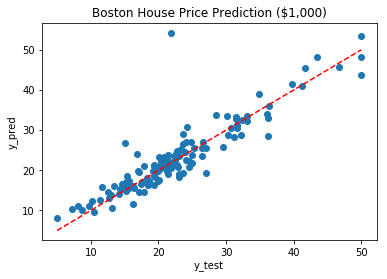

In [14]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

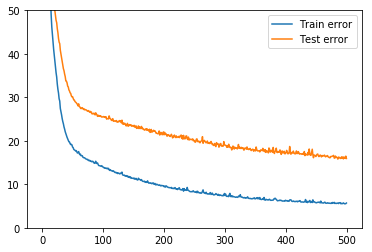

In [15]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn OLS 와 비교

In [16]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [17]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = regr.predict(X_test)

In [19]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-11.70588222   4.48307849   1.1106347    2.90457353  -9.29789805
  18.67801665  -0.2647484  -16.560401     6.38249523  -6.67314456
  -8.68547433   2.94037418 -18.22941727]
Intercept: 
 29.686131882766848


In [20]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("Variance score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 27.10
Variance score: 0.67


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

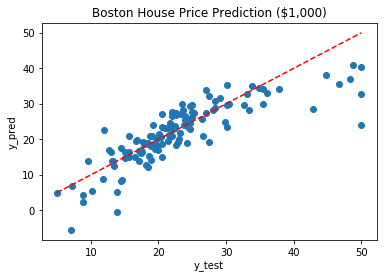

In [21]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [23]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산